In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree, metrics
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [3]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


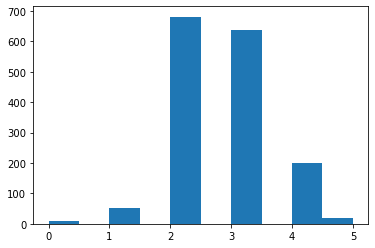

In [28]:
plt.hist(df.quality)
plt.show()

In [5]:
quality_mapping = {3:0,4:1,5:2,6:3,7:4,8:5}
df.loc[:,"quality"] = df.quality.map(quality_mapping)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [8]:
df = df.sample(frac=1).reset_index(drop=True)
df

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,479,8.5,0.340,0.44,1.7,0.079,6.0,12.0,0.99605,3.52,0.63,10.7,2
1,707,10.2,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,2
2,466,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.99670,3.39,0.56,9.8,2
3,721,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0
4,710,6.8,0.915,0.29,4.8,0.070,15.0,39.0,0.99577,3.53,0.54,11.1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,249,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,3
1595,648,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,4
1596,996,9.0,0.620,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,2
1597,44,9.3,0.410,0.39,2.2,0.064,12.0,31.0,0.99840,3.26,0.65,10.2,2


In [10]:
df_train = df.head(1000)
df_test = df.tail(599)

In [36]:
clf = tree.DecisionTreeClassifier(max_depth=7)

In [37]:
cols = df.columns.values[1:12]

In [38]:
cols

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [39]:
cols[2]

'citric acid'

In [40]:
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [41]:
train_predictions = clf.predict(df_train[cols])

In [42]:
test_predictions = clf.predict(df_test[cols])

In [43]:
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
train_accuracy

0.775

In [44]:
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
test_accuracy

0.5626043405676127

In [61]:
train_accuracies = []; test_accuracies= []; depth = []
for i in range(24):
    clf = tree.DecisionTreeClassifier(max_depth=i+1)
    clf.fit(df_train[cols],df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    test_accuracies.append(test_accuracy)
    depth.append(i+1)

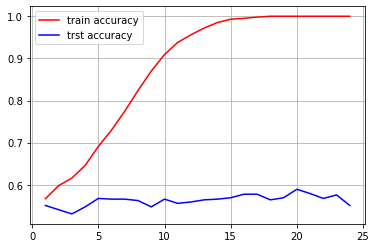

In [65]:
plt.plot(depth,train_accuracies, color="red",label="train accuracy")
plt.plot(depth,test_accuracies, color="blue",label="trst accuracy")
plt.grid()
plt.legend()
plt.show()

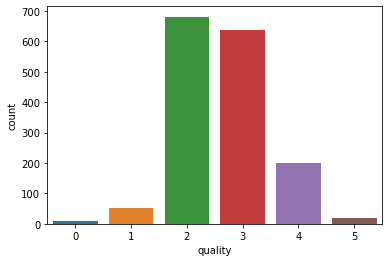

In [68]:
b = sns.countplot(x='quality', data = df)